In [ ]:
# This is a the Test Simulation for Planet Host Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
planets_tab = Table.read('workspace/target_files/Planet/datafileBarclayTESS.txt'
                         ,format='cds',data_start=1)
print(planets_tab.columns)

planets_tab['TICID'] = np.array(planets_tab['TICID'],dtype='int32')
planets_tab['RAdeg'] = np.array(planets_tab['RAdeg'],dtype='float64')*u.deg
planets_tab['DEdeg'] = np.array(planets_tab['DEdeg'],dtype='float64')*u.deg
planets_tab['ELON'] = np.array(planets_tab['ELON'],dtype='float64')*u.deg
planets_tab['ELAT'] = np.array(planets_tab['ELAT'],dtype='float64')*u.deg
planets_tab['2min-target'] = np.array(planets_tab['2min-target'],dtype='bool')
planets_tab

<TableColumns names=('TICID','RAdeg','DEdeg','ELON','ELAT','Priority','2min-target','Camera','Obslen','Num-sectors','Vmag','Kmag','Tmag','Star-radius','Star-mass','Distance','Subgiant','Detected','Detected-cons','Planet-period','Planet-radius','Ntransits','Ars','Ecc','Rprs','Impact','Duration','Depth-obs','Insol','Noise-level','SNR')>


TICID,RAdeg,DEdeg,ELON,ELAT,Priority,2min-target,Camera,Obslen,Num-sectors,Vmag,Kmag,Tmag,Star-radius,Star-mass,Distance,Subgiant,Detected,Detected-cons,Planet-period,Planet-radius,Ntransits,Ars,Ecc,Rprs,Impact,Duration,Depth-obs,Insol,Noise-level,SNR
,deg,deg,deg,deg,--,,--,d,--,mag,mag,mag,solRad,solMass,pc,--,--,--,d,Rgeo,--,--,--,--,--,h,ppm,--,ppm,--
int32,float64,float64,float64,float64,str22,bool,str1,str18,str2,str18,str18,str18,str19,str19,str18,str1,str1,str1,str18,str18,str3,str18,str22,str21,str22,str19,str18,str19,str18,str18
3886296,10.6825234268,-7.78932498361,6.71268,-11.38505344,0.000638407721896,False,1,27.4,1,15.464,11.663,13.751,0.561,0.608,--,0,1,1,8.903368460227776,5.8953523229254285,3,27.309315453726324,0.05189225994921162,0.09620668541244612,0.3362806140343589,2.5994316404600877,9206.182251505768,12.186649974645892,2136.664532287848,12.032144946527904
3898497,11.4122041748,-9.90600343511,6.52247184,-13.61342119,0.00169365501283,False,1,27.4,1,13.362,10.052999999999999,11.862,1.34214,0.64706595426,--,1,1,1,2.2002441955210017,7.216286175145817,13,4.589533424487198,0.016195015134831733,0.0492237023957709,0.7146316598285998,2.8630364577717167,2399.3946698946825,578.3907496599826,568.6317993394205,25.742792863112264
3958932,12.5272703212,-6.74703803595,8.84722239,-11.15555691,0.000948932109741,False,1,27.4,1,13.225999999999999,10.978,12.18,0.867217,0.841307101846,--,0,1,0,11.822694069662314,19.439606344573683,2,23.78323649864493,0.1265155888463898,0.20521921973920265,0.09597552878058063,4.564353438654929,41861.7902101913,47.81053454019817,696.8234903646138,181.50961908286672
40081742,6.9898763682,-11.8787315502,1.61479561,-13.66389281,0.00101901163469,False,1,27.4,1,12.994000000000002,10.888,12.097000000000001,0.8597790000000001,0.834449921949,--,0,1,1,6.995948493276504,8.051368561782494,4,16.862187447618698,0.04315140219500797,0.08573165799946117,0.32655925656757695,3.2845835264894876,7349.912553732975,93.2415712616032,660.2913040127767,40.34751068081025
10506521,28.6228093623,64.7931556695,55.6538014,48.50057359,0.0005491968626880001,False,2,54.8,2,8.795,7.404,8.235,1.07892,1.4257600000000001,72.6315157202,0,1,1,3.759818246067273,4.034581522442444,15,10.618757840938347,0.10454177270592632,0.0342347846345981,0.6355090946750762,2.214332330712213,1155.2219584230675,749.9273115353942,98.4603555845996,67.61936149355287
80260761,7.30701182652,-43.1290091276,345.53232708,-41.61739102,0.00151424215803,False,2,27.4,1,11.989,9.923,10.954,0.930774,0.850942,214.753535445,0,1,0,13.66701694470892,3.0009495368588888,2,24.500473794136724,0.02976291785767685,0.029517039592793882,0.3749531294728279,4.087454487766847,857.3651638120655,62.590843237657666,332.48209121562,7.372911803050061
80262344,7.612832,-46.184368,343.530693,-44.307818,0.00681388737156,True,2,27.4,1,13.468,8.892999999999997,11.06,0.4,0.41600000000000004,--,0,1,0,10.768502444514846,2.28920966413878,2,38.3128310015104,0.04602877387253942,0.05239428618797632,0.6927683819658783,1.701434358610829,2731.9586521198376,4.3726573064224725,352.83436378193636,14.283210715178063
11568274,19.8664031855,-27.5662292796,6.31811523,-32.98481344,0.00128838842691,False,2,27.4,1,10.599,9.579,10.219,1.4856200000000002,1.33849247717,--,0,1,1,3.0485695499570684,21.127101639143245,9,6.565954922710415,0.02039219888096648,0.13019386889403511,0.5410207166581332,3.544874458212262,15318.091258639612,1743.1646495086522,225.25016535657417,384.11495698493985


# Select Stars in these fields
### Southern TESS CVZ
Coordinates: ecliptic latitude < -66 
### Northern BHM Medium Cadence/Legacy RV area
155 < Galactic Longitude < 260

38 < Galactic Latitude < 80

In [3]:
south_tess_tab = planets_tab[(planets_tab['ELAT'] < -66)]
planet_coord = SkyCoord(planets_tab['RAdeg'],planets_tab['DEdeg'],unit=(u.deg,u.deg),frame="fk5")
planet_coord_gal = planet_coord.transform_to(Galactic())
mask = (planet_coord_gal.l > 155*u.deg) & (planet_coord_gal.l < 260*u.deg) & (planet_coord_gal.b > 38*u.deg) & (
        planet_coord_gal.b < 260*u.deg)
bhm_tess_tab = planets_tab[mask]
planets_tab = vstack([south_tess_tab,bhm_tess_tab])

/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


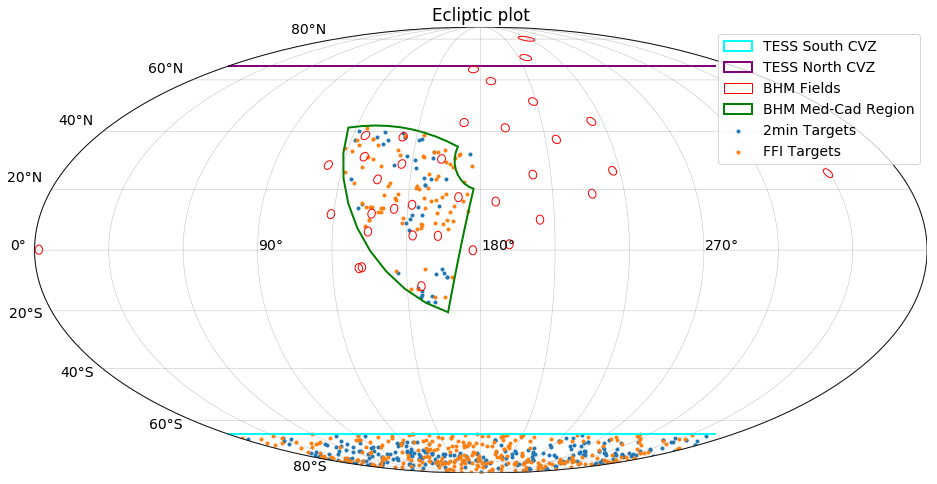

In [4]:
plt.rcParams.update({'font.size': 14})

(fig,bmap) = testfield_ecl()
#Plot Planet Targets
xplan,yplan = bmap(planets_tab['ELON'][planets_tab['2min-target']],planets_tab['ELAT'][planets_tab['2min-target']])
bmap.scatter(xplan,yplan,marker='.',label='2min Targets',alpha=1)
xplan,yplan = bmap(planets_tab['ELON'][np.logical_not(planets_tab['2min-target'])]
                   ,planets_tab['ELAT'][np.logical_not(planets_tab['2min-target'])])
bmap.scatter(xplan,yplan,marker='.',label='FFI Targets',alpha=1)
plt.title("Ecliptic plot")
plt.legend()
plt.show()

## Match with CTL to get H mag

In [5]:
ctl_tab = Table.read('workspace/target_files/Planet/CTL62/all_RA.csv')
ctl_tab

TICID,H
int64,float64
3774574,11.574
3774533,9.817
3805456,10.92
3805457,11.254
3811753,12.236
3804469,11.425
3810169,12.0
3810852,11.958
3811082,12.055


In [6]:
hmag_list = list()
for ticid in planets_tab['TICID']:
    hold_tab = ctl_tab[(ctl_tab['TICID'] == ticid)]
    if len(hold_tab) == 1:
        hmag_list.append((hold_tab['H'].data)[0])
    else:
        print("TIC ID: {} not found!".format(ticid))

In [7]:
planets_tab['Hmag'] = np.array(hmag_list,dtype='float32')

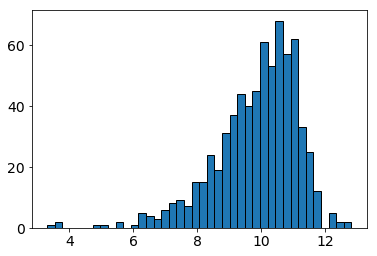

In [8]:
plt.hist(planets_tab['Hmag'],bins=40,edgecolor='black')
plt.show()

## Create Target Table

In [9]:
target_tab = Table()

## Determine Cadence type

In [10]:
(bins, edges) = np.histogram(planets_tab['Hmag'],bins=61,range=(9.475,12.525))
mag_center = (edges[1:] - edges[0:-1])/2 + edges[0:-1]
numexp = h2exp(mag_center,sn=80,exptime=15)
for i in np.arange(len(mag_center)):
    print("H Mag: {:.2f} Num Exp: {} Num Stars: {}".format(mag_center[i],numexp[i],bins[i]))

H Mag: 9.50 Num Exp: 1.0 Num Stars: 5
H Mag: 9.55 Num Exp: 1.0 Num Stars: 12
H Mag: 9.60 Num Exp: 1.0 Num Stars: 7
H Mag: 9.65 Num Exp: 1.0 Num Stars: 11
H Mag: 9.70 Num Exp: 1.0 Num Stars: 7
H Mag: 9.75 Num Exp: 1.0 Num Stars: 8
H Mag: 9.80 Num Exp: 1.0 Num Stars: 12
H Mag: 9.85 Num Exp: 1.0 Num Stars: 5
H Mag: 9.90 Num Exp: 1.0 Num Stars: 9
H Mag: 9.95 Num Exp: 1.0 Num Stars: 12
H Mag: 10.00 Num Exp: 1.0 Num Stars: 11
H Mag: 10.05 Num Exp: 1.0 Num Stars: 9
H Mag: 10.10 Num Exp: 1.0 Num Stars: 20
H Mag: 10.15 Num Exp: 1.0 Num Stars: 10
H Mag: 10.20 Num Exp: 1.0 Num Stars: 14
H Mag: 10.25 Num Exp: 1.0 Num Stars: 6
H Mag: 10.30 Num Exp: 1.0 Num Stars: 12
H Mag: 10.35 Num Exp: 1.0 Num Stars: 12
H Mag: 10.40 Num Exp: 1.0 Num Stars: 16
H Mag: 10.45 Num Exp: 2.0 Num Stars: 12
H Mag: 10.50 Num Exp: 2.0 Num Stars: 12
H Mag: 10.55 Num Exp: 2.0 Num Stars: 11
H Mag: 10.60 Num Exp: 2.0 Num Stars: 17
H Mag: 10.65 Num Exp: 2.0 Num Stars: 18
H Mag: 10.70 Num Exp: 2.0 Num Stars: 11
H Mag: 10.75 Num E

## I am going to do a cut at H<12.0 for the moment

In [11]:
sm_planets_tab = planets_tab[(planets_tab['Hmag'] < 12.0)]

11.854
1127.0


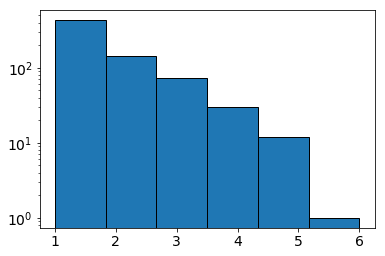

In [12]:
numexp = h2exp(sm_planets_tab['Hmag'],sn=80)
print(np.max(sm_planets_tab['Hmag']))
print(np.sum(numexp))
plt.hist(numexp,bins=6,log=True,edgecolor='black')
plt.show()

In [13]:
cadence_list = ["planet_exp{:.0f}".format(num) for num in numexp]
print(cadence_list[0:40])

['planet_exp1', 'planet_exp2', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp4', 'planet_exp2', 'planet_exp2', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp2', 'planet_exp1', 'planet_exp3', 'planet_exp3', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp1', 'planet_exp3', 'planet_exp1', 'planet_exp2', 'planet_exp1', 'planet_exp2', 'planet_exp1', 'planet_exp2', 'planet_exp1', 'planet_exp2', 'planet_exp2', 'planet_exp1', 'planet_exp2', 'planet_exp2', 'planet_exp3', 'planet_exp1']


In [14]:
target_tab['ra'] = sm_planets_tab['RAdeg']
target_tab['dec'] = sm_planets_tab['DEdeg']
target_tab['cadence'] = cadence_list
target_tab['type'] = np.repeat('Planet',len(sm_planets_tab))
target_tab['priority'] = np.repeat(np.array(63,dtype='int32'),len(sm_planets_tab))
target_tab['priority'][np.logical_not(sm_planets_tab['2min-target'])] = 68
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(sm_planets_tab))

In [15]:
target_tab

ra,dec,cadence,type,priority,value
deg,deg,,,,
float64,float64,str11,str6,int32,float32
19.5476152734,-78.8596346765,planet_exp1,Planet,68,1.0
21.3933359808,-78.5124639616,planet_exp2,Planet,68,1.0
12.7014481739,-80.7017602368,planet_exp1,Planet,68,1.0
27.8051372576,-66.4809017169,planet_exp1,Planet,68,1.0
29.1666557634,-69.2386484764,planet_exp1,Planet,63,1.0
8.45702215226,-80.4891773325,planet_exp1,Planet,68,1.0
29.058198851,-71.6136344864,planet_exp1,Planet,63,1.0
29.058198851,-71.6136344864,planet_exp1,Planet,63,1.0


In [16]:
target_tab.write('fps_planet_target.fits',overwrite=True)

## Create Cadence Table
The cadence I would like to use is using minimums
```
[[  0.  nan  nan  nan  nan  nan]
 [  0.   2.  nan  nan  nan  nan]
 [  0.   2.  20.  nan  nan  nan]
 [  0.   2.  20.   2.  nan  nan]
 [  0.   2.  20.   2.   2.  nan]
 [  0.   2.  20.   2.   2.   2.]]
```
Instead I will add 365 to everything so that  it can be done the following year

In [17]:
cadence_tab = Table()

In [18]:
cadence_tab['cadence'] = np.array(['planet_exp1', 'planet_exp2','planet_exp3'
                                    ,'planet_exp4','planet_exp5', 'planet_exp6'])
cadence_tab['nepochs'] = np.array([1,2,3,4,5,6],dtype='int32')
delta = np.array([[0,np.nan,np.nan,np.nan,np.nan,np.nan]
                ,[0,2,np.nan,np.nan,np.nan,np.nan]
                ,[0,2,20,np.nan,np.nan,np.nan]
                ,[0,2,20,2,np.nan,np.nan]
                ,[0,2,20,2,2,np.nan]
                ,[0,2,20,2,2,2]],dtype='float32')
#Add the 365
delta[(delta > 0)] = delta[(delta > 0)] + 365
print(delta)
cadence_tab['delta'] = delta

[[   0.   nan   nan   nan   nan   nan]
 [   0.  367.   nan   nan   nan   nan]
 [   0.  367.  385.   nan   nan   nan]
 [   0.  367.  385.  367.   nan   nan]
 [   0.  367.  385.  367.  367.   nan]
 [   0.  367.  385.  367.  367.  367.]]


/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


In [19]:
cadence_tab

cadence,nepochs,delta [6]
str11,int32,float32
planet_exp1,1,0.0 .. nan
planet_exp2,2,0.0 .. nan
planet_exp3,3,0.0 .. nan
planet_exp4,4,0.0 .. nan
planet_exp5,5,0.0 .. nan
planet_exp6,6,0.0 .. 367.0


In [20]:
softness = np.array([[1,np.nan,np.nan,np.nan,np.nan,np.nan]
                ,[1,.5,np.nan,np.nan,np.nan,np.nan]
                ,[1,.5,5,np.nan,np.nan,np.nan]
                ,[1,.5,5,.5,np.nan,np.nan]
                ,[1,.5,5,.5,.5,np.nan]
                ,[1,.5,5,.5,.5,.5]],dtype='float32')
#Add the 365
softness[(softness != 1)] = 365
print(softness)
cadence_tab['softness'] = softness

[[   1.  365.  365.  365.  365.  365.]
 [   1.  365.  365.  365.  365.  365.]
 [   1.  365.  365.  365.  365.  365.]
 [   1.  365.  365.  365.  365.  365.]
 [   1.  365.  365.  365.  365.  365.]
 [   1.  365.  365.  365.  365.  365.]]


In [21]:
lunation = np.array([[1,np.nan,np.nan,np.nan,np.nan,np.nan]
                ,[1,1,np.nan,np.nan,np.nan,np.nan]
                ,[1,1,1,np.nan,np.nan,np.nan]
                ,[1,1,1,1,np.nan,np.nan]
                ,[1,1,1,1,1,np.nan]
                ,[1,1,1,1,1,1]],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation

[[  1.  nan  nan  nan  nan  nan]
 [  1.   1.  nan  nan  nan  nan]
 [  1.   1.   1.  nan  nan  nan]
 [  1.   1.   1.   1.  nan  nan]
 [  1.   1.   1.   1.   1.  nan]
 [  1.   1.   1.   1.   1.   1.]]


In [22]:
instrument = np.array([['apogee',np.nan,np.nan,np.nan,np.nan,np.nan]
                ,['apogee','apogee',np.nan,np.nan,np.nan,np.nan]
                ,['apogee','apogee','apogee',np.nan,np.nan,np.nan]
                ,['apogee','apogee','apogee','apogee',np.nan,np.nan]
                ,['apogee','apogee','apogee','apogee','apogee',np.nan]
                ,['apogee','apogee','apogee','apogee','apogee','apogee']],dtype='str')
print(instrument)
cadence_tab['instrument'] = instrument

[['apogee' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'nan' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee']]


In [23]:
cadence_tab

cadence,nepochs,delta [6],softness [6],lunation [6],instrument [6]
str11,int32,float32,float32,float32,str6
planet_exp1,1,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp2,2,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp3,3,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp4,4,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp5,5,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp6,6,0.0 .. 367.0,1.0 .. 365.0,1.0 .. 1.0,apogee .. apogee


In [24]:
cadence_tab.write('fps_planet_cadence.fits',overwrite=True)

In [25]:
test =  Table.read('fps_planet_cadence.fits')
test

cadence,nepochs,delta [6],softness [6],lunation [6],instrument [6]
bytes11,int32,float32,float32,float32,bytes24
planet_exp1,1,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp2,2,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp3,3,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp4,4,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp5,5,0.0 .. nan,1.0 .. 365.0,1.0 .. nan,apogee .. nan
planet_exp6,6,0.0 .. 367.0,1.0 .. 365.0,1.0 .. 1.0,apogee .. apogee
